In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [2]:
complaints = pd.read_csv('../data/311-service-requests.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# 2.1 Данные

In [3]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unsp

# 2.2 Выбор колонок и строк

In [4]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [5]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [6]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [7]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 2.3 Выбор нескольких колонок

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [8]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


That showed us a summary, and then we can look at the first 10 rows:

In [9]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 Какой тип жалобы наиболее распространен?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [10]:
complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

If we just wanted the top 10 most common complaints, we can do this:

In [11]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

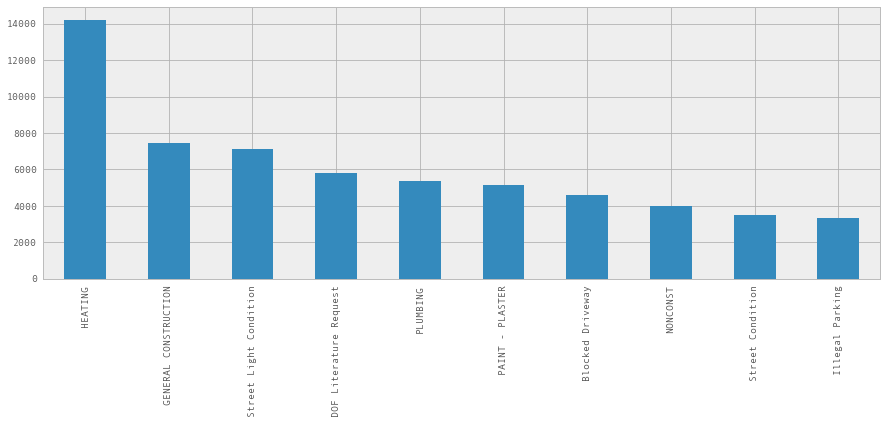

In [12]:
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  